In [1]:
!pip install wordcloud

# Gensim is an open-source library for unsupervised topic modeling and natural language processing
!pip install gensim

# install nltk
# NLTK: Natural Language tool kit
!pip install nltk
!python -m pip install -U gensim

     |████████████████████████████████| 23.9MB 5.5MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
stock_df = pd.read_csv('/content/stock_sentiment.csv')

In [4]:
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [6]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


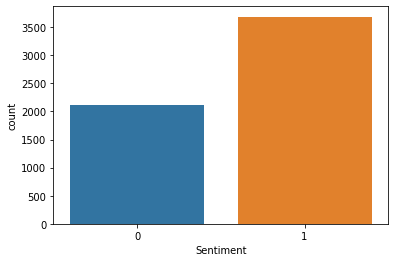

In [7]:
sns.countplot(stock_df['Sentiment'])

In [8]:
# data cleaning

import string

In [9]:
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [10]:
stock_df['text without punctuations'] = stock_df['Text'].apply(remove_punc)

In [11]:
stock_df

,Text,Sentiment,text without punctuations
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [12]:
nltk.download("stopwords")
stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https','from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])


In [14]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [15]:
stock_df['text without punc & stopwords'] = stock_df['Text'].apply(preprocess)


In [16]:
stock_df

,Text,Sentiment,text without punctuations,text without punc & stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, fea, geed, indicator, trades, ..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, near, mon..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


In [17]:
stock_df['text Without punc & Stopwords Joined'] = stock_df['text without punc & stopwords'].apply(lambda x: " ".join(x))

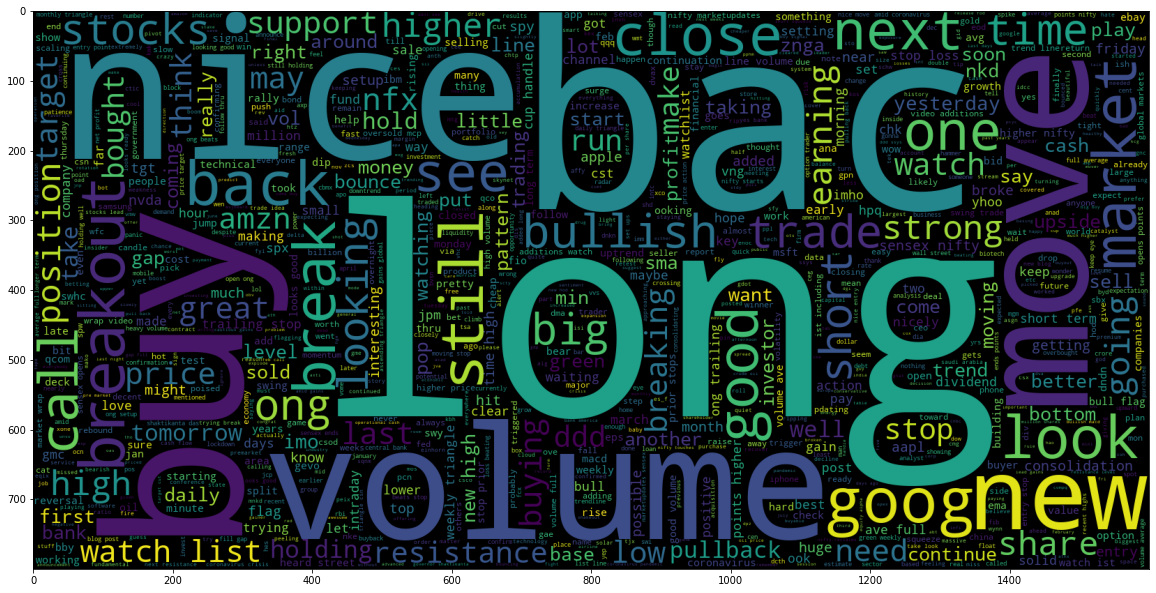

In [18]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(stock_df[stock_df['Sentiment']==1]['text Without punc & Stopwords Joined']))
plt.imshow(wc)

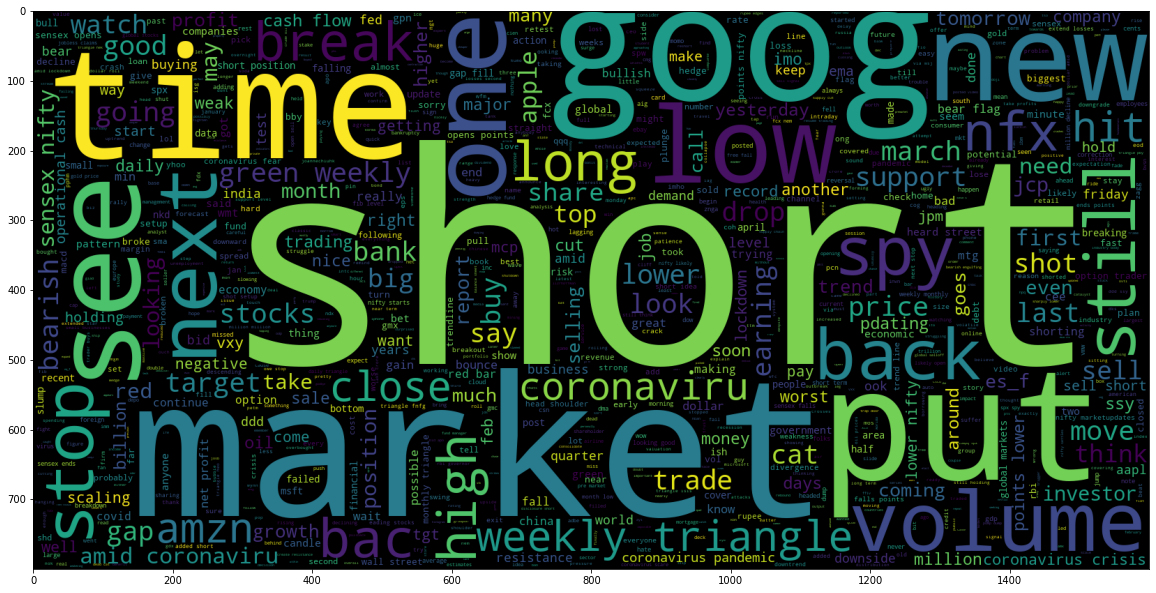

In [19]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words=1000,width=1600,height=800).generate(" ".join(stock_df[stock_df['Sentiment']==0]['text Without punc & Stopwords Joined']))
plt.imshow(wc)

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
print(stock_df['text Without punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['text Without punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [22]:
text_length = [ len(nltk.word_tokenize(x)) for x in stock_df['text Without punc & Stopwords Joined'] ]

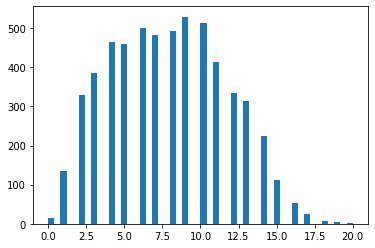

In [23]:
plt.hist(text_length, bins=50)
plt.show()

In [24]:
list_of_words = []
for i in stock_df['text without punc & stopwords']:
  for j in i:
    list_of_words.append(j)

In [25]:
total_words = len(list(set(list_of_words)))
total_words

8809

In [26]:
X = stock_df['text without punc & stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [27]:
X_train.shape

(4632,)

In [28]:
X_test.shape

(1159,)

In [29]:
X_train

60      [goog, respond, positively, good, jobless, cla...
5232    [development, comes, chinese, coffee, chainâ, ...
4307    [anf, weekly, kumo, note, volume, macd, trying...
5213    [switzerland, lost, long, held, position, econ...
3384    [goog, etail, dont, get, stuck, holding, googl...
                              ...                        
2396    [idcc, take, look, idcc, performs, touching, l...
1055           [significant, vol, bac, good, entry, imho]
5286    [month, coronavirus, felled, american, busines...
3394                           [pcn, looking, move, hold]
2054    [app, added, risk, bankruptcy, abating, woods,...
Name: text without punc & stopwords, Length: 4632, dtype: object

In [30]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [31]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [32]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [33]:
y_train_cat.shape

(4632, 2)

In [34]:
y_test_cat.shape

(1159, 2)

# LSTM

In [35]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4510208   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,330,818
Trainable params: 5,330,818
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
116/116 [==============================] - 26s 200ms/step - loss: 0.6427 - acc: 0.6286 - val_loss: 0.5238 - val_acc: 0.7433
Epoch 2/2
116/116 [==============================] - 23s 197ms/step - loss: 0.3063 - acc: 0.8819 - val_loss: 0.5342 - val_acc: 0.7443


In [37]:
pred = model.predict(padded_test)

In [38]:
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [39]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [40]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7808455565142364

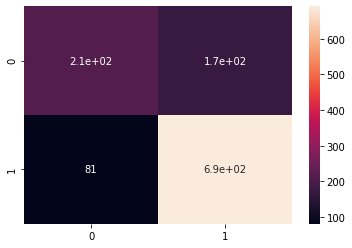

In [41]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)

# LSTM2

In [42]:
from tensorflow.keras.layers import Dense,SpatialDropout1D
from tensorflow.keras.layers import LSTM,Dropout
from keras.layers import Bidirectional
from tensorflow.keras.optimizers import RMSprop,Adam

model2=Sequential()
model2.add(Embedding(10000,100,input_length=40))
model2.add(SpatialDropout1D(0.4))
model2.add(LSTM(100))
model2.add(Dropout(0.1))
model2.add(Dense(2, activation='softmax'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 100)           1000000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 40, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 1,080,602
Trainable params: 1,080,602
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 8,verbose=2)

Epoch 1/8
116/116 - 6s - loss: 0.6037 - accuracy: 0.6688 - val_loss: 0.5228 - val_accuracy: 0.7389
Epoch 2/8
116/116 - 3s - loss: 0.3509 - accuracy: 0.8518 - val_loss: 0.5349 - val_accuracy: 0.7573
Epoch 3/8
116/116 - 3s - loss: 0.2230 - accuracy: 0.9112 - val_loss: 0.5549 - val_accuracy: 0.7454
Epoch 4/8
116/116 - 3s - loss: 0.1529 - accuracy: 0.9417 - val_loss: 0.7338 - val_accuracy: 0.7465
Epoch 5/8
116/116 - 3s - loss: 0.1097 - accuracy: 0.9582 - val_loss: 0.6225 - val_accuracy: 0.7335
Epoch 6/8
116/116 - 3s - loss: 0.0904 - accuracy: 0.9671 - val_loss: 1.0074 - val_accuracy: 0.7497
Epoch 7/8
116/116 - 3s - loss: 0.0701 - accuracy: 0.9709 - val_loss: 1.2090 - val_accuracy: 0.7357
Epoch 8/8
116/116 - 3s - loss: 0.0682 - accuracy: 0.9752 - val_loss: 1.1424 - val_accuracy: 0.7389


In [45]:
pred2 = model2.predict(padded_test)
prediction2 = []
for i in pred2:
  prediction2.append(np.argmax(i))

original2 = []
for i in y_test_cat:
  original2.append(np.argmax(i))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original2, prediction2)
accuracy

0.6876617773943055

# Naive Bayes approach

In [46]:
positive = stock_df[stock_df['Sentiment']==0]

In [47]:
negative = stock_df[stock_df['Sentiment']==1]

In [49]:
from nltk.corpus import stopwords


In [50]:
def message_cleaning(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [51]:
stock_df_clean = stock_df['Text'].apply(message_cleaning)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
stock_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(stock_df['Text']).toarray()

In [54]:
stock_countvectorizer.shape

(5791, 13456)

In [55]:
x = stock_countvectorizer
y = stock_df['Sentiment']


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

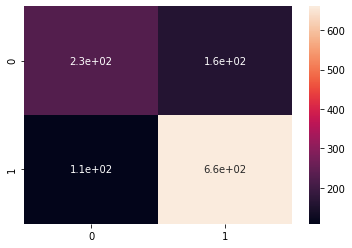

In [59]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       390
           1       0.80      0.86      0.83       769

    accuracy                           0.77      1159
   macro avg       0.74      0.72      0.73      1159
weighted avg       0.76      0.77      0.76      1159



# Random Forest

In [61]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [62]:
predictions = text_classifier.predict(X_test)


In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[203 187]
 [ 58 711]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       390
           1       0.79      0.92      0.85       769

    accuracy                           0.79      1159
   macro avg       0.78      0.72      0.74      1159
weighted avg       0.79      0.79      0.78      1159

0.7886108714408974


# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.7903364969801553


# KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
text_classifier2 = KNeighborsClassifier(n_neighbors=10)
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [68]:
predictions = text_classifier2.predict(X_test)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[124 266]
 [116 653]]
              precision    recall  f1-score   support

           0       0.52      0.32      0.39       390
           1       0.71      0.85      0.77       769

    accuracy                           0.67      1159
   macro avg       0.61      0.58      0.58      1159
weighted avg       0.65      0.67      0.65      1159

0.6704055220017257


# MLP Classifier

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

In [72]:
predictions = clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[250 140]
 [122 647]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66       390
           1       0.82      0.84      0.83       769

    accuracy                           0.77      1159
   macro avg       0.75      0.74      0.74      1159
weighted avg       0.77      0.77      0.77      1159

0.7739430543572045
